In [8]:
import numpy as np
import pandas as pd
import sqlite3

df = pd.read_csv("../../datasets/2016to2020_example_data/kbo_data_2016to2020.csv")

In [12]:
df

,yearID,teamID,franchID,SB_D,CS_D,SB_R,CS_R,SF_H,HBP_H,ERA,...,PPF,SV,IPOuts,HA,HRA,BBA,SOA,E,DP,W
0,2016,HH,DJ,124,66,64,38,41,91,5.76,...,0.998399,24,3878,1520,155,634,976,124,229,66
1,2016,HT,GJ,136,49,101,50,45,87,4.97,...,0.966443,38,3828,1456,131,561,965,111,219,70
2,2016,KT,SW,115,55,96,46,45,48,5.92,...,1.006298,27,3819,1593,145,560,980,130,264,53
3,2016,LG,SO,80,49,121,70,54,72,5.04,...,0.984622,34,3863,1426,122,539,909,103,217,71
4,2016,LT,BS,90,59,145,64,41,83,5.63,...,0.987212,27,3799,1486,161,585,1009,91,229,66
5,2016,NC,MS,70,43,99,41,52,93,4.48,...,0.942484,36,3859,1314,137,516,1147,100,221,83
6,2016,OB,SO,82,44,85,45,68,86,4.45,...,0.987209,36,3863,1385,136,498,982,79,261,93
7,2016,SK,IC,106,64,89,60,47,102,4.87,...,1.062769,31,3822,1386,151,527,945,123,234,69
8,2016,SS,DG,115,58,104,50,55,75,5.64,...,1.030987,34,3847,1507,193,518,935,90,213,65
9,2016,WO,SO,98,60,154,83,59,63,4.96,...,1.042616,38,3841,1487,152,435,895,94,223,77


In [10]:
print(df.head())

   yearID teamID franchID  SB_D  CS_D  SB_R  CS_R  SF_H  HBP_H   ERA  ...  \
0    2016     HH       DJ   124    66    64    38    41     91  5.76  ...   
1    2016     HT       GJ   136    49   101    50    45     87  4.97  ...   
2    2016     KT       SW   115    55    96    46    45     48  5.92  ...   
3    2016     LG       SO    80    49   121    70    54     72  5.04  ...   
4    2016     LT       BS    90    59   145    64    41     83  5.63  ...   

        PPF  SV  IPOuts    HA  HRA  BBA   SOA    E   DP   W  
0  0.998399  24    3878  1520  155  634   976  124  229  66  
1  0.966443  38    3828  1456  131  561   965  111  219  70  
2  1.006298  27    3819  1593  145  560   980  130  264  53  
3  0.984622  34    3863  1426  122  539   909  103  217  71  
4  0.987212  27    3799  1486  161  585  1009   91  229  66  

[5 rows x 43 columns]


In [11]:
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
df['Attendence'] = df['Attendence'].fillna(df['Attendence'].median())
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


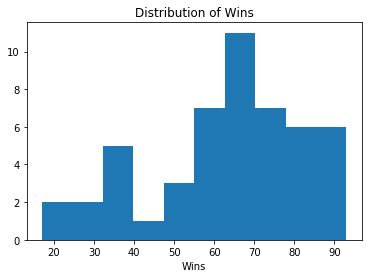

In [14]:
# import the pyplot module from matplotlib
import matplotlib.pyplot as plt

# matplotlib plots inline
%matplotlib inline

# Plotting distribution of wins
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

In [15]:
print(df['W'].mean())

63.34


In [21]:
data_use = df.drop(['teamID', 'franchID'], axis=1)

In [22]:
# Import necessary modules from `sklearn` 
from sklearn.cluster import KMeans
from sklearn import metrics

# Create silhouette score dictionary
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    l = km.fit_predict(data_use)
    s_s = metrics.silhouette_score(data_use, l)
    s_score_dict[i] = [s_s]

# Print out `s_score_dict`
print(s_score_dict)

{2: [0.6137704856583508], 3: [0.663185624103228], 4: [0.6553343851099157], 5: [0.6869474655050835], 6: [0.7386369811358506], 7: [0.770637359049164], 8: [0.7557452517556207], 9: [0.7621938525422783], 10: [0.7694077600641823]}


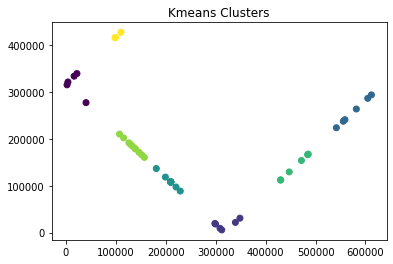

In [24]:
# Create K-means model and determine euclidian distances for each data point
kmeans_model = KMeans(n_clusters=7, random_state=1)
distances = kmeans_model.fit_transform(data_use)

# Create scatter plot using labels from K-means model as color
labels = kmeans_model.labels_

plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('Kmeans Clusters')

plt.show()

In [ ]:
df.sample()